In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [26]:
objpoints = []
imgpoints = []

In [27]:
images = glob.glob('./calibration_data/*.png')

nx = 9 # number of inside corners in x
ny = 7 # number of inside corners in y


# Prepare obj points, like (0, 0, 0), (1, 0, 0), (2, 0, 0)....., (7, 5, 0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,0:2] =  np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinates 

for fname in images:
    image = cv2.imread(fname)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

print(len(imgpoints))

27


Camera Matrix:  [[786.12894299   0.         738.30147561]
 [  0.         788.3908978  654.33443158]
 [  0.           0.           1.        ]]
Dist Coeff:  [[-3.35544543e-01  1.32387882e-01 -4.28605906e-05  4.32443741e-04
  -2.58637927e-02]]
Optimal New camera matrix:  [[306.83248901   0.         678.24590209]
 [  0.         387.08901978 566.53298366]
 [  0.           0.           1.        ]]


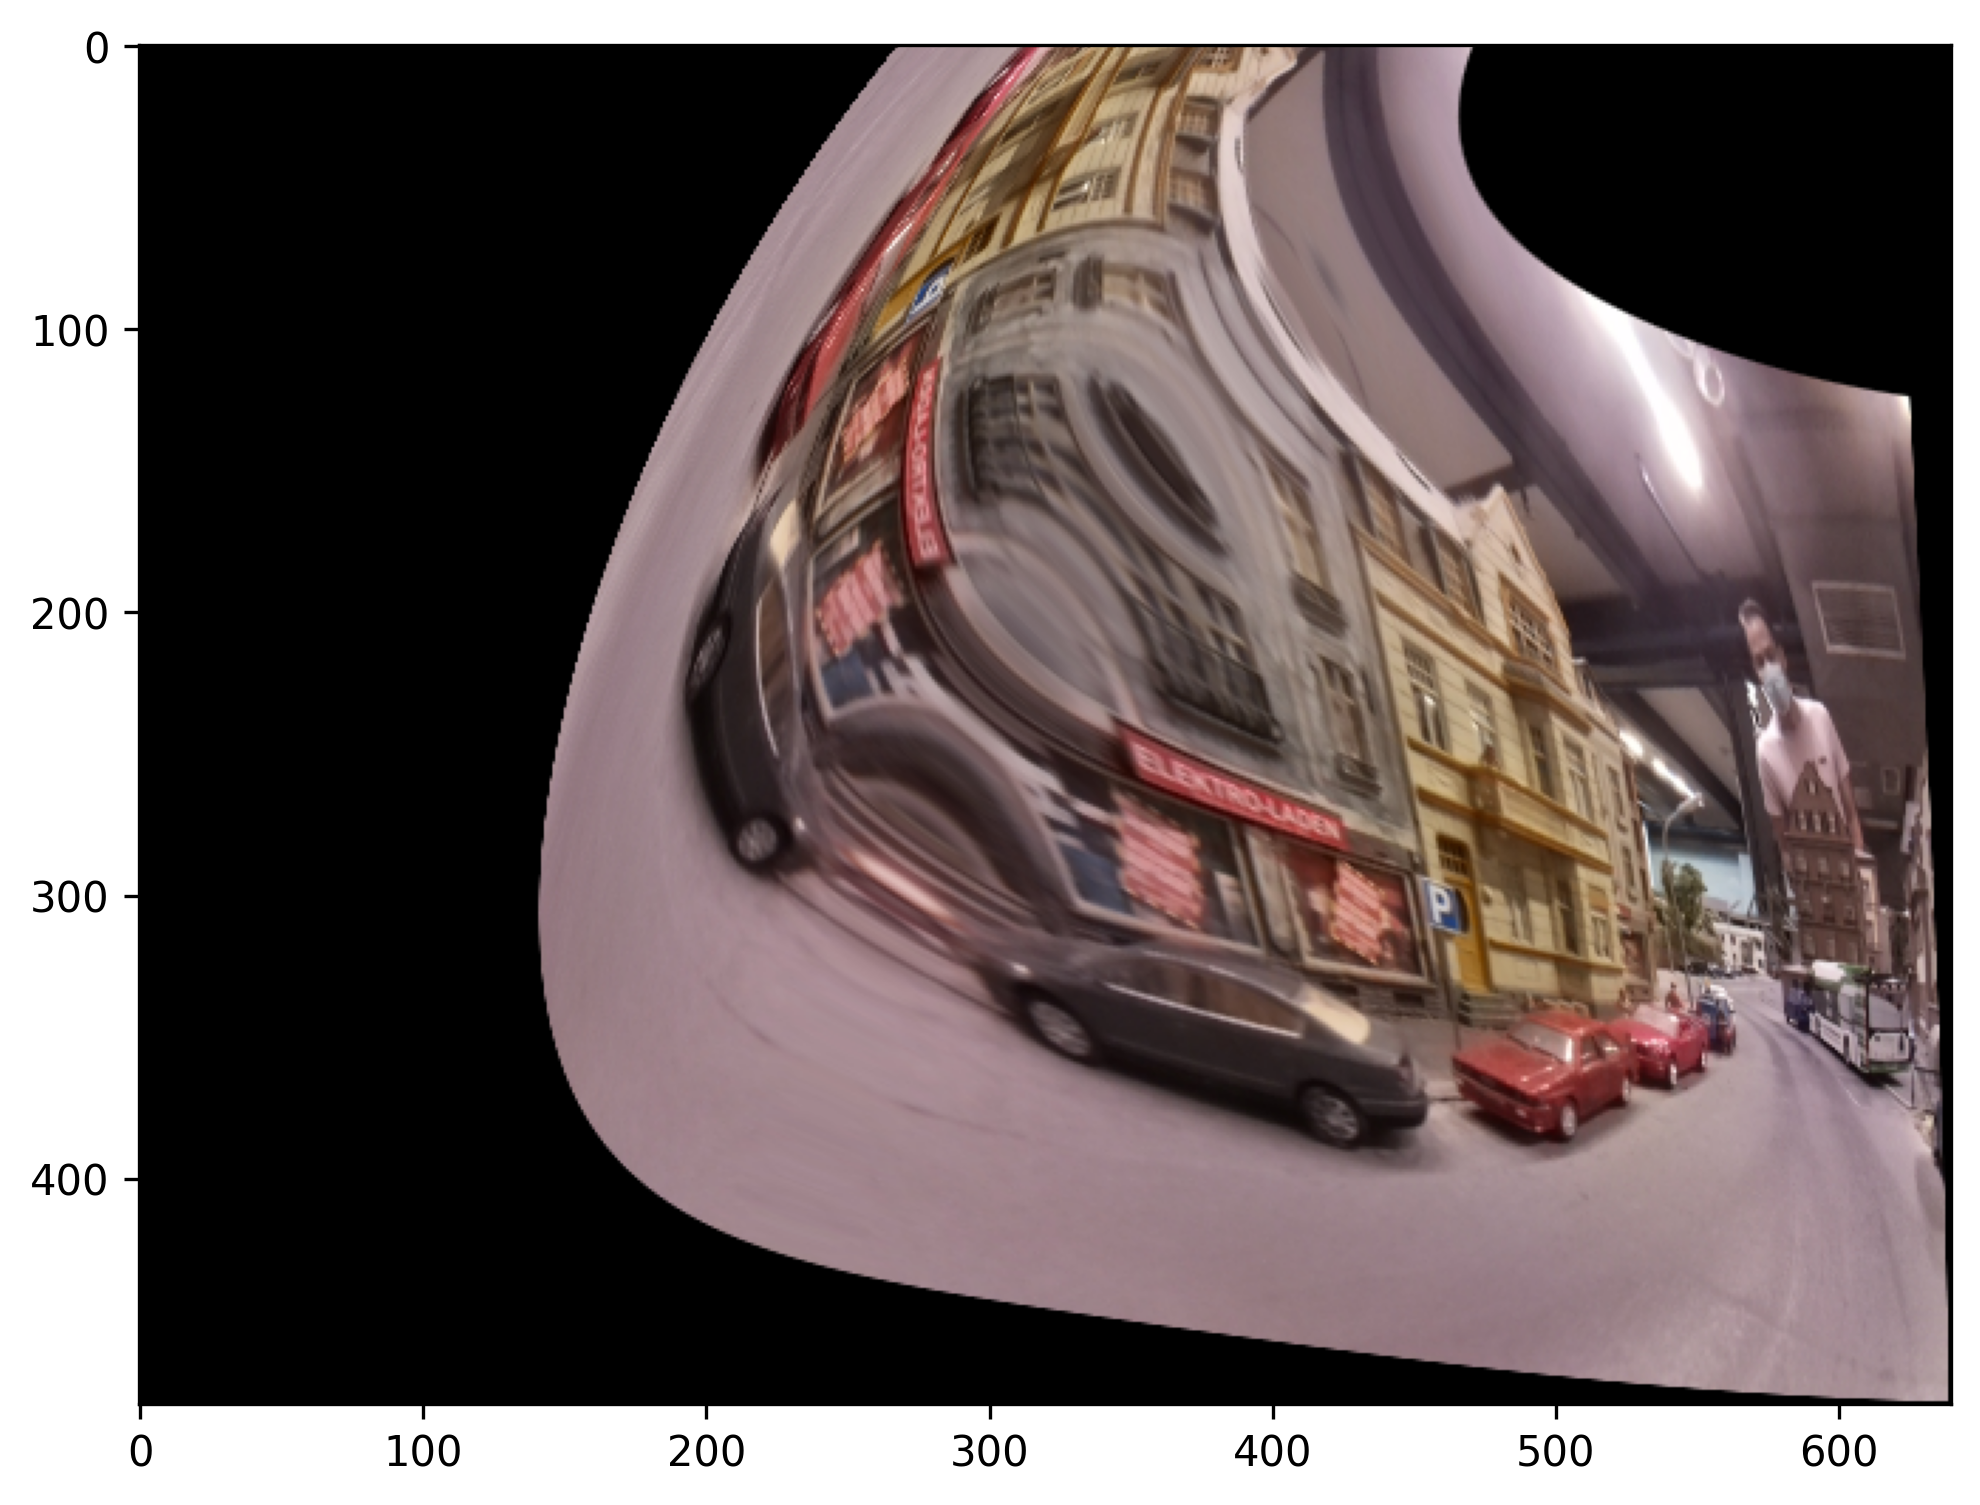

In [7]:
test_img = cv2.imread('/home/danielriege/Desktop/miwula.png')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
ret, cam_mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints, image.shape[:2], None, None)

h,  w = test_img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(cam_mtx, dist, (w,h), 1.0, (w,h))

print("Camera Matrix: ",cam_mtx)
print("Dist Coeff: ", dist)
print("Optimal New camera matrix: ", newcameramtx)

undist = cv2.undistort(test_img, cam_mtx, dist, None, newcameramtx)

plt.figure(figsize=(8, 6), dpi=300)
plt.imshow(undist)
plt.show()